In [3]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 2.3 MB/s eta 0:00:0000:01
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.7-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.4 MB/s eta 0:00:00a 0:00:01m
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

[

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [6]:
data_path = r"/Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/preprocessed_day.csv"
df = pd.read_csv(data_path, encoding= 'unicode_escape')

In [7]:
df.head()

,instant,yr,holiday,workingday,atemp,hum,windspeed,cnt,Date,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,0,0,0.363625,0.805833,0.160446,985,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,2,0,0,0,0.353739,0.696087,0.248539,801,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,3,0,0,1,0.189405,0.437273,0.248309,1349,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,4,0,0,1,0.212122,0.590435,0.160296,1562,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,5,0,0,1,0.229270,0.436957,0.186900,1600,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [9]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [10]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['weekday_6',
 'mnth_4',
 'season_2',
 'mnth_2',
 'weekday_2',
 'weathersit_2',
 'mnth_5',
 'weathersit_3',
 'season_3',
 'windspeed',
 'weekday_1',
 'mnth_3',
 'weekday_3',
 'mnth_10',
 'mnth_12',
 'season_4',
 'mnth_9',
 'mnth_11',
 'workingday',
 'atemp',
 'mnth_8',
 'yr',
 'hum',
 'Date',
 'instant',
 'holiday',
 'weekday_5',
 'mnth_7',
 'weekday_4',
 'mnth_6']

In [11]:
# Create the dependent variable data
y = df['cnt']

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [12]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 30)
(584,)
(147, 30)
(147,)


In [14]:
num_cols = ['atemp','hum', 'windspeed']

scaler = StandardScaler()
scaler.fit(X_train)

# Fit on train numeric columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform test numeric columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
import joblib
import os

# Path to your existing folder
folder_path = "/Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files" 

# Make sure the folder exists (does NOT create a new one if already exists)
os.makedirs(folder_path, exist_ok=True)

# Full path of the scaler file
scaler_path = os.path.join(folder_path, "scaler.pkl")

# Save scaler
joblib.dump(scaler, scaler_path)

print(f"Scaler saved at: {scaler_path}")

Scaler saved at: /Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files/scaler.pkl


In [15]:
X_train[0:10]

,instant,yr,holiday,workingday,atemp,hum,windspeed,Date,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
97,98,0,0,1,-0.892109,1.517365,0.490775,8,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
503,504,1,0,1,0.489966,-0.716387,-0.689399,18,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
642,643,1,0,1,0.836664,0.708339,-0.941611,4,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
498,499,1,0,0,0.698013,-0.338640,0.466236,13,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
303,304,0,0,1,-0.699508,0.568539,-1.088139,31,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
570,571,1,0,1,1.437170,0.223515,0.287420,24,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
250,251,0,0,1,0.515821,2.254877,0.042603,8,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
17,18,0,0,1,-1.454020,1.698804,-0.559073,18,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
595,596,1,0,0,0.898230,-0.145309,-0.152153,18,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
240,241,0,0,1,0.836561,-0.493310,-0.388280,29,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


In [15]:
X.columns.tolist()

['instant',
 'yr',
 'holiday',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'Date',
 'season_2',
 'season_3',
 'season_4',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']

In [16]:
joblib.dump(list(X.columns), "feature_names.pkl")

['feature_names.pkl']

In [34]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [35]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [36]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

## Random Forest Regressor

In [17]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"/Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "randomforest.pkl")

# Save the model
joblib.dump(rf,file_path)

print(f"Model saved at: {file_path}")

Model saved at: /Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files/randomforest.pkl


In [19]:
rf.score(X_test,y_test)

0.8927151770414167

In [20]:
y_pred_train = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

In [21]:
MAE = mean_absolute_error(y_test,y_pred_rf)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_rf)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_rf)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 499.9044897959183.
The Mean Squred Error(MSE) is 456297.6750204081.
The Root Mean Squared Error(RMSE) is 675.4980940168581.
The R2 Score is 0.8927151770414167.
Adjusted R2 is 0.8649691021383348.


In [22]:
test_dict = {'Model':"Random Forest Regressor",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [23]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Random Forest Regressor,499.9045,456297.675,675.4981,0.8927,0.865


## GridSearchCV On Random Forest

In [24]:
param = {'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [25]:
rf_reg = RandomForestRegressor()
rf_tuning = GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [25, 50, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [26]:
print(f'The best parameter is {rf_tuning.best_params_}')
print(f'The best negative mean squred error value is {rf_tuning.best_score_}')

The best parameter is {'max_depth': 9, 'n_estimators': 100}
The best negative mean squred error value is -496326.957069451


In [27]:
rf_rg = RandomForestRegressor(max_depth= 9, n_estimators= 80)
rf_rg.fit(X_train,y_train)

,n_estimators,80
,criterion,'squared_error'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"/Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "randomforest(CV).pkl")

# Save the model
joblib.dump(rf_rg,file_path)

print(f"Model saved at: {file_path}")

Model saved at: /Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files/randomforest(CV).pkl


In [29]:
rf_rg.score(X_test,y_test)

0.8944677116759432

In [30]:
y_pred_train = rf_rg.predict(X_train)
y_pred_rf_rg = rf_rg.predict(X_test)

In [31]:
MAE = mean_absolute_error(y_test,y_pred_rf_rg)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_rf_rg)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_rf_rg)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_rf_rg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 507.3237388710276.
The Mean Squred Error(MSE) is 448843.8949136367.
The Root Mean Squared Error(RMSE) is 669.9581292242349.
The R2 Score is 0.8944677116759432.
Adjusted R2 is 0.8671748784886871.


In [32]:
test_dict = {'Model':"Random Forest Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [33]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Random Forest Regressor,499.9045,456297.6750,675.4981,0.8927,0.8650
1,Random Forest Regressor(GridsearchCV),507.3237,448843.8949,669.9581,0.8945,0.8672


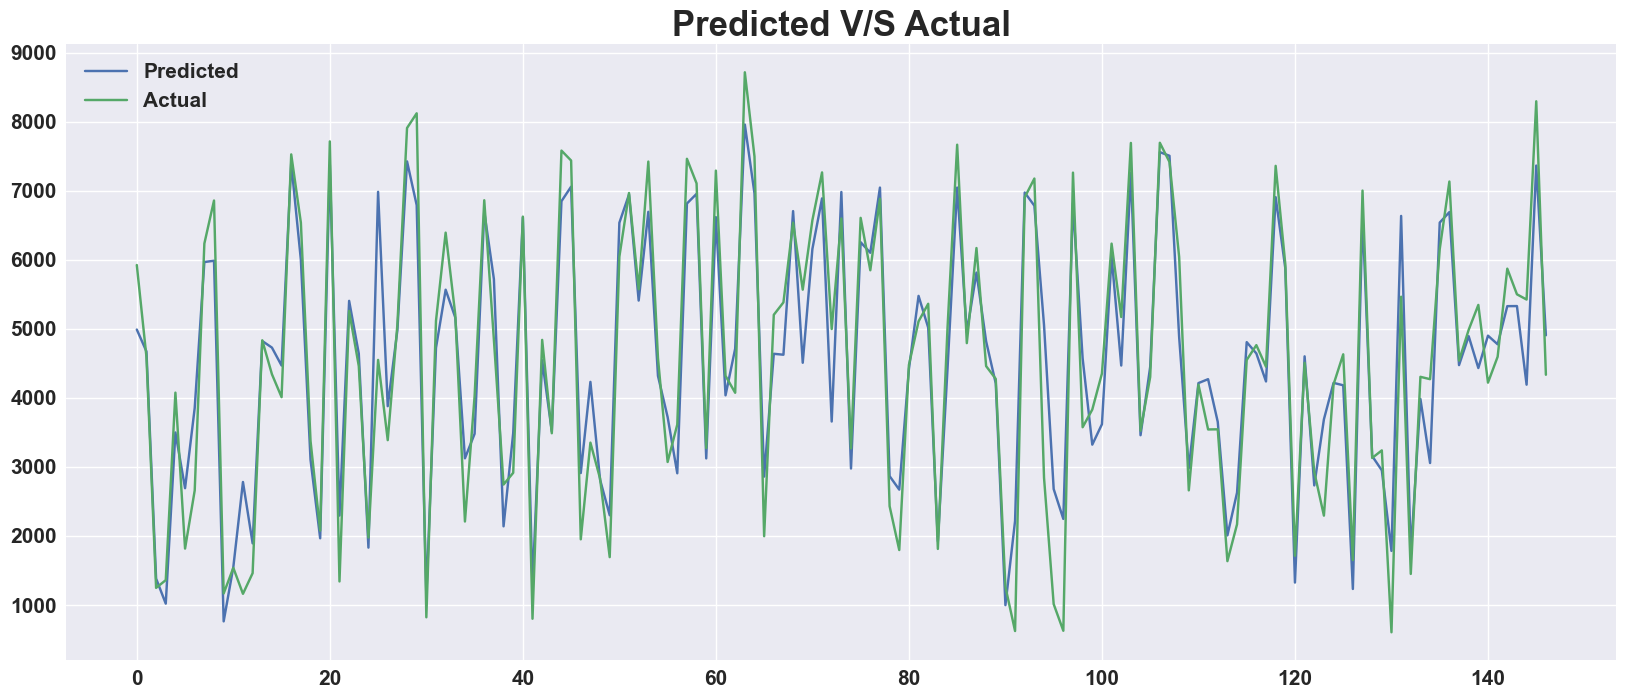

In [37]:
plot_Pred_vs_actual(y_pred_rf_rg,y_test)

Text(0.5, 0, 'y_predicted')

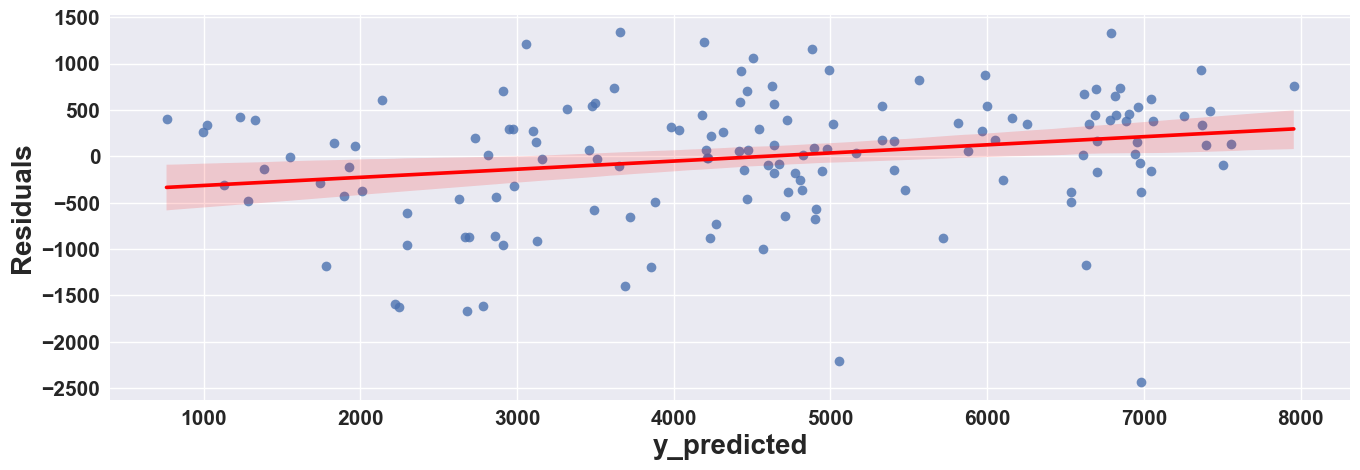

In [38]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_rf_rg,y=y_test-y_pred_rf_rg,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

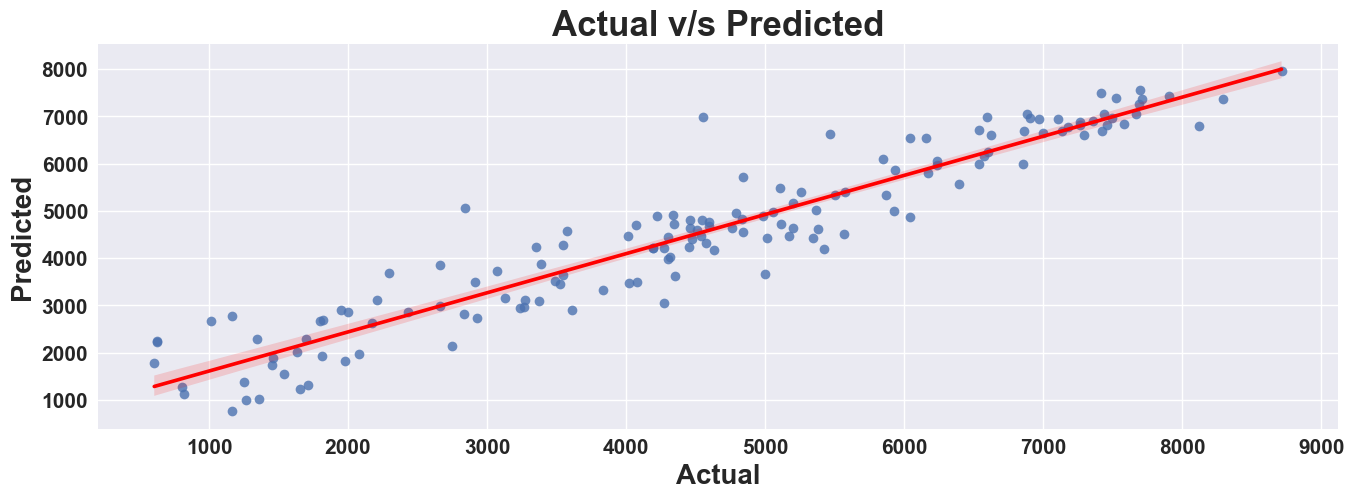

In [39]:
plot_scatter(y_pred_rf_rg,y_test)

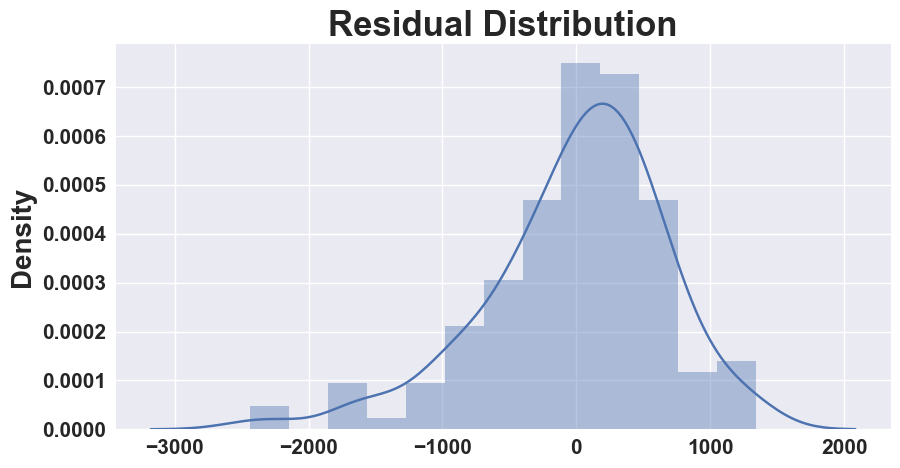

In [40]:
Residual_distPlot(y_pred_rf_rg,y_test)

Text(0.5, 0, 'Relative Importance')

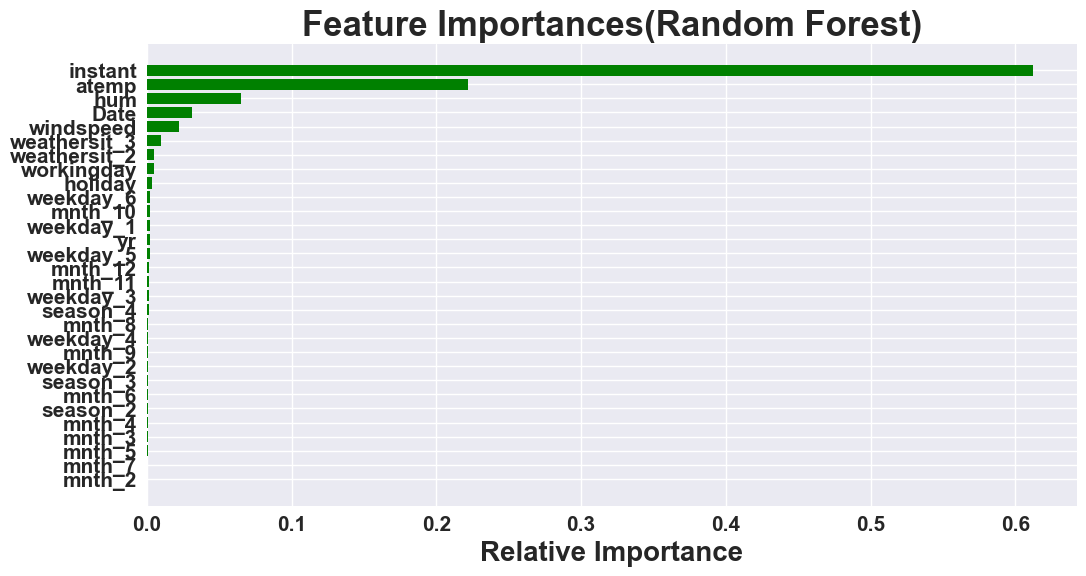

In [41]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

## Gradient Boosting

In [42]:
gradboo_reg = GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [43]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"/Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "gradient_boost.pkl")

# Save the model
joblib.dump(gradboo_reg,file_path)

print(f"Model saved at: {file_path}")

Model saved at: /Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files/gradient_boost.pkl


In [44]:
gradboo_reg.score(X_test,y_test)

0.9089640432196657

In [45]:
y_pred_train = gradboo_reg.predict(X_train)
y_pred_grad = gradboo_reg.predict(X_test)

In [46]:
MAE = mean_absolute_error(y_test,y_pred_grad)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_grad)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_grad)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_grad))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 449.5742162882339.
The Mean Squred Error(MSE) is 387188.926416563.
The Root Mean Squared Error(RMSE) is 622.2450694192465.
The R2 Score is 0.9089640432196657.
Adjusted R2 is 0.8854202612937172.


In [47]:
test_dict = {'Model':"Gardient boosting Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [48]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Random Forest Regressor,499.9045,456297.6750,675.4981,0.8927,0.8650
1,Random Forest Regressor(GridsearchCV),507.3237,448843.8949,669.9581,0.8945,0.8672
2,Gardient boosting Regression,449.5742,387188.9264,622.2451,0.9090,0.8854


## GridSearchCV on Gradient Boosting Regressor

In [49]:
gbr = GradientBoostingRegressor()

In [50]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [50,80,100,150],
               'max_depth'    : [4,6,8,10]}

In [51]:
grad_boo_tuning = GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
grad_boo_tuning.fit(X_train,y_train)

,estimator,GradientBoostingRegressor()
,param_grid,"{'learning_rate': [0.01, 0.02, ...], 'max_depth': [4, 6, ...], 'n_estimators': [50, 80, ...], 'subsample': [0.9, 0.5, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [52]:
print(f'The best parameter is {grad_boo_tuning.best_params_}')
print(f'The best negative mean squred error value is {grad_boo_tuning.best_score_}')

The best parameter is {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.2}
The best negative mean squred error value is 0.88397172108648


In [53]:
grad_tuned = GradientBoostingRegressor(learning_rate=0.04,max_depth=10,n_estimators=150,subsample=0.5)
grad_tuned.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.04
,n_estimators,150
,subsample,0.5
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,10
,min_impurity_decrease,0.0
,init,None


In [54]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"/Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "gradient_boost(CV).pkl")

# Save the model
joblib.dump(grad_tuned,file_path)

print(f"Model saved at: {file_path}")

Model saved at: /Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/Saved_model_files/gradient_boost(CV).pkl


In [55]:
grad_tuned.score(X_test,y_test)

0.9037117480790214

In [56]:
y_pred_train = grad_tuned.predict(X_train)
y_pred_tuned = grad_tuned.predict(X_test)

In [57]:
MAE = mean_absolute_error(y_test,y_pred_tuned)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_tuned)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_tuned)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_tuned))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 468.21384324373435.
The Mean Squred Error(MSE) is 409527.6878098883.
The Root Mean Squared Error(RMSE) is 639.9435036078484.
The R2 Score is 0.9037117480790214.
Adjusted R2 is 0.878809613961527.


In [58]:
test_dict = {'Model':"Gradient Boosting Regression(GridSearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [59]:
test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Random Forest Regressor,499.9045,456297.6750,675.4981,0.8927,0.8650
1,Random Forest Regressor(GridsearchCV),507.3237,448843.8949,669.9581,0.8945,0.8672
2,Gardient boosting Regression,449.5742,387188.9264,622.2451,0.9090,0.8854
3,Gradient Boosting Regression(GridSearchCV),468.2138,409527.6878,639.9435,0.9037,0.8788


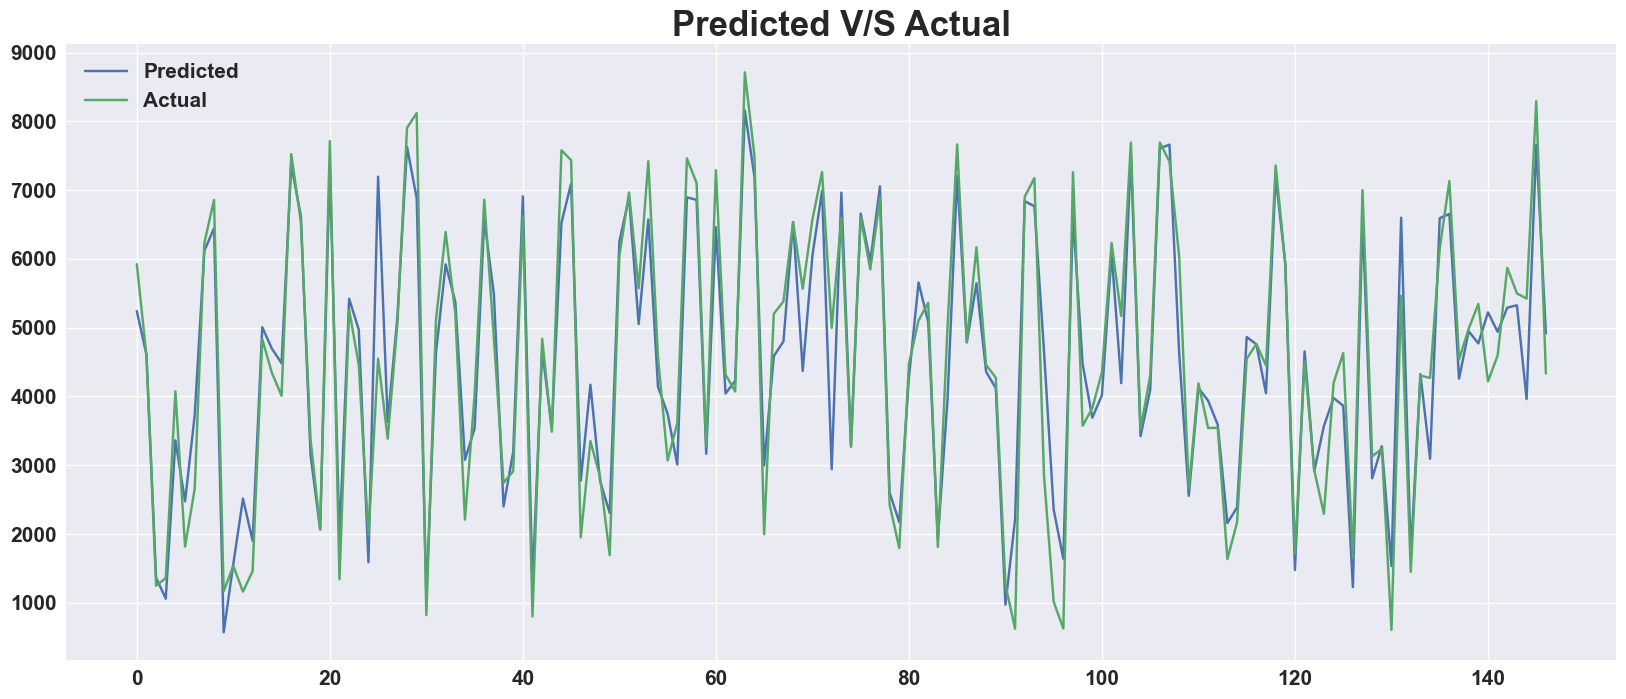

In [60]:
plot_Pred_vs_actual(y_pred_tuned,y_test)

Text(0.5, 0, 'y_predicted')

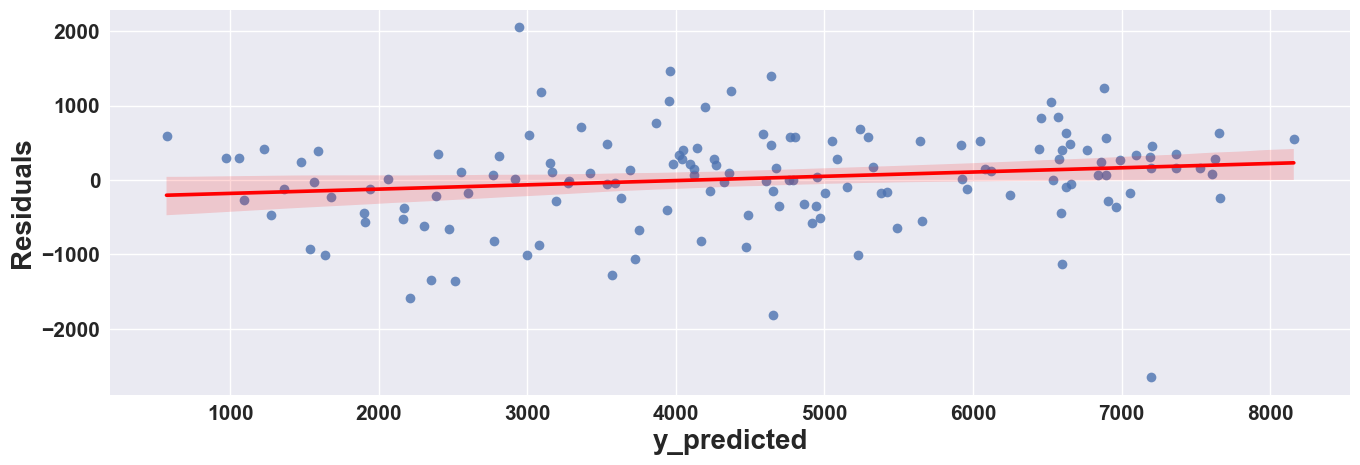

In [61]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_tuned,y=y_test-y_pred_tuned,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

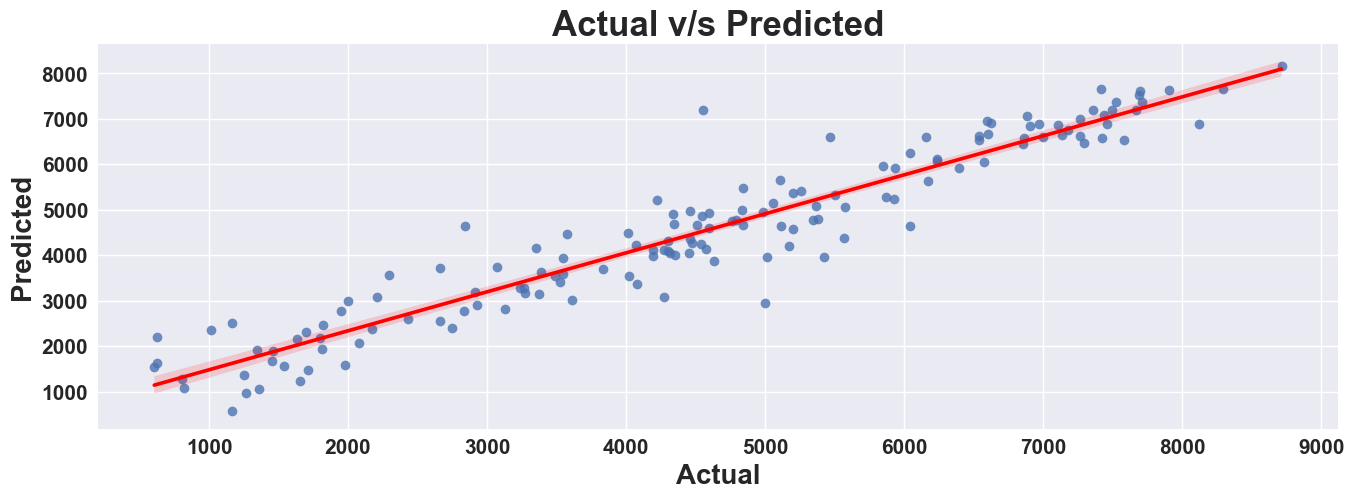

In [62]:
plot_scatter(y_pred_tuned,y_test)

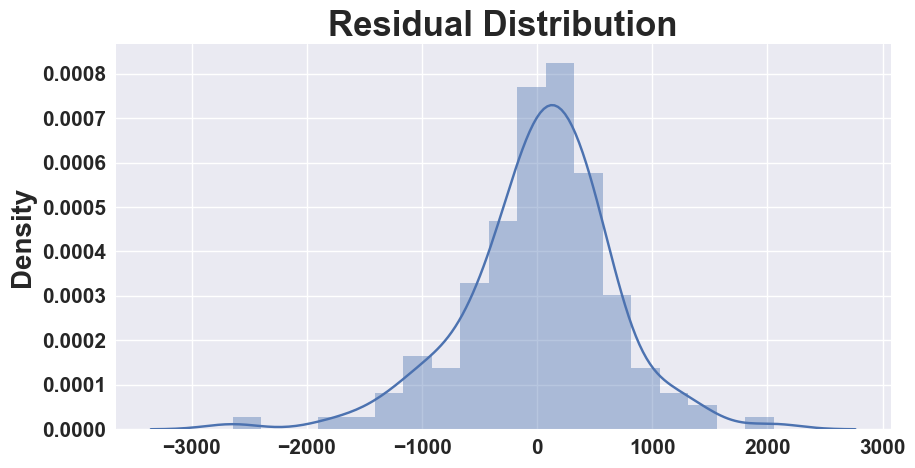

In [63]:
Residual_distPlot(y_pred_tuned,y_test)

Text(0.5, 0, 'Relative Importance')

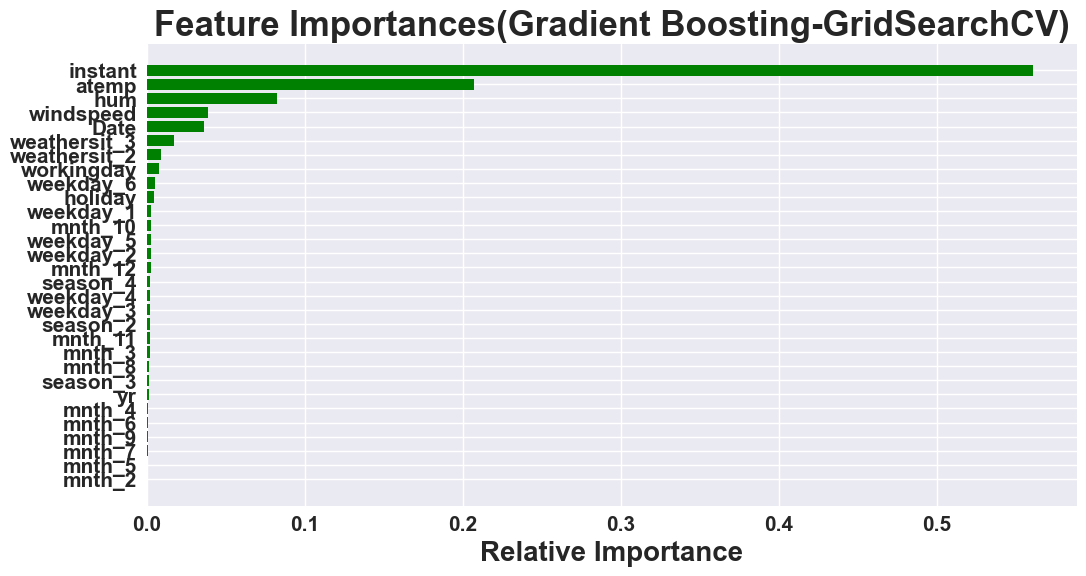

In [64]:
imp_variables=X.columns
importances = grad_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

In [65]:
test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Random Forest Regressor,499.9045,456297.6750,675.4981,0.8927,0.8650
1,Random Forest Regressor(GridsearchCV),507.3237,448843.8949,669.9581,0.8945,0.8672
2,Gardient boosting Regression,449.5742,387188.9264,622.2451,0.9090,0.8854
3,Gradient Boosting Regression(GridSearchCV),468.2138,409527.6878,639.9435,0.9037,0.8788
4,Gradient Boosting Regression(GridSearchCV),468.2138,409527.6878,639.9435,0.9037,0.8788


In [68]:
def plot_r2(test_results_df, save_dir="plots"):


    df = test_results_df.sort_values(by="R2_score", ascending=False)

    plt.figure(figsize=(10, 6))
    
    # Custom color gradient
    colors = plt.cm.cividis(np.linspace(0.3, 1, len(df)))

    plt.barh(df["Model"], df["R2_score"], color=colors)

    plt.xlabel("R² Score", fontsize=12, color="white")
    plt.ylabel("Models", fontsize=12, color="white")
    plt.title("Model Comparison by R² Score", fontsize=15, fontweight="bold", color="yellow")

    # Reverse y-axis so best model appears on top
    plt.gca().invert_yaxis()

    plt.grid(axis="x", linestyle="--", alpha=0.3, color="white")

    plt.tight_layout()
    plt.show()

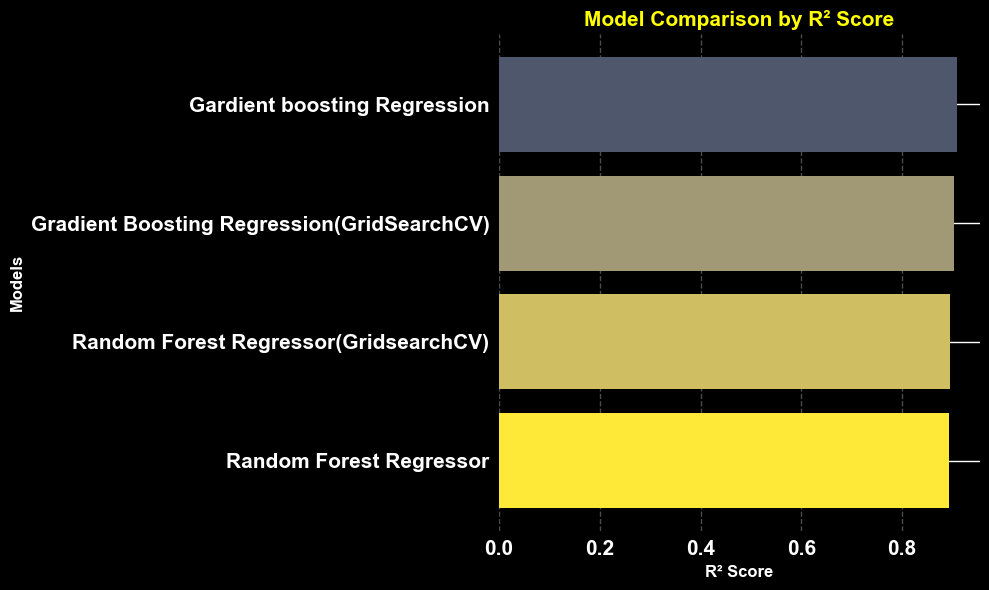

In [69]:
plot_r2(test_results_df)

In [18]:
X_test.to_numpy()[0, :]

array([197, 0, 0, 0, 1.0213620694601442, -0.2761785809125537,
       0.24669145169028492, 16, False, True, False, False, False, False,
       False, False, True, False, False, False, False, False, False,
       False, False, False, False, True, False, False], dtype=object)

In [19]:
y_test


196    5923
187    4592
14     1248
31     1360
390    4075
       ... 
566    5870
688    5499
266    5423
504    8294
239    4334
Name: cnt, Length: 147, dtype: int64